In [1]:
import pandas as pd
import numpy as np

In [2]:
song_data=pd.read_csv(r'C:\Users\DELL\Downloads\songs\song_data.csv')
song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [3]:
count=pd.read_csv(r'C:\Users\DELL\Downloads\songs\10000.txt',sep="\t",header=None,names=['user','song_id','rating'])
count.head()

,user,song_id,rating
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


#### We will be first using a collaborative approach and later a content based approach on the artist_name

In [4]:
merged=pd.merge(count,song_data,on="song_id")
merged.head()

,user,song_id,rating,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,The Cove,Thicker Than Water,Jack Johnson,0
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,The Cove,Thicker Than Water,Jack Johnson,0


In [5]:
merged.groupby(["user","song_id"]).size().reset_index().rename(columns={0:'num'}).sort_values("num",ascending=False)

,user,song_id,num
1286693,a3f5a657180bf254517feb11909c78aa5bc19c91,SOLNCTS12A8C1405EF,3
1910307,f4d69a995669b1335dd39cdbd5094ca419fc7508,SOMFTUN12A6D4F60A5,3
1174221,95cd9cdd906aef4caf3bb9359af8eb24981c2145,SOKUAGP12A8C133B94,3
1202194,992a1857d0d224a5e0eb7f751e4c5e2635d8ad1e,SOKUAGP12A8C133B94,3
935156,7783d58f04540a7a0bfc9dcd99fae7d5dad66596,SOKBIIQ12AB017FEFC,3
...,...,...,...
680878,5711875efee5d61fba1148c28600d05854120fda,SOJGSIO12A8C141DBF,1
680877,5711875efee5d61fba1148c28600d05854120fda,SOJEQBQ12A6701E2E6,1
680875,5711875efee5d61fba1148c28600d05854120fda,SOIYEFV12A6701DB02,1
680874,5711875efee5d61fba1148c28600d05854120fda,SOITRTA12A6D4F8261,1


In [6]:
#We have a maximum of a user rating a song 3 times we will take the average of these ratings because all ratings are different
new_rating=merged.groupby(["user","song_id"])["rating"].mean().reset_index().rename(columns={"rating":"new_rating"})
new_df=pd.merge(new_rating,merged,on=["user","song_id"])
new_df.head()

,user,song_id,new_rating,rating,title,release,artist_name,year
0,00003a4459f33b92906be11abe0e93efc423c0ff,SOJJRVI12A6D4FBE49,1.0,1,Only You (Illuminate Album Version),Illuminate,David Crowder*Band,2003
1,00003a4459f33b92906be11abe0e93efc423c0ff,SOKJWZB12A6D4F9487,4.0,4,Do You Want To Know Love (Pray For Rain Album ...,Very Best Of PFR,PFR,0
2,00003a4459f33b92906be11abe0e93efc423c0ff,SOMZHIH12A8AE45D00,3.0,3,You're A Wolf (Album),Leaves In The River,Sea Wolf,2007
3,00003a4459f33b92906be11abe0e93efc423c0ff,SONFEUF12AAF3B47E3,3.0,3,Não É Proibido,Não É Proibido,Marisa Monte,0
4,00003a4459f33b92906be11abe0e93efc423c0ff,SOVMGXI12AF72A80B0,1.0,1,Hey Mama,Elephunk,Black Eyed Peas,2003


In [7]:
new_df[["new_rating","rating"]]

,new_rating,rating
0,1.0,1
1,4.0,4
2,3.0,3
3,3.0,3
4,1.0,1
...,...,...
2086941,1.0,1
2086942,1.0,1
2086943,1.0,1
2086944,1.0,1


In [8]:
analysis=new_df.groupby("song_id").agg(
avg_rating=("new_rating","mean"),
rating_count=("new_rating","count"))

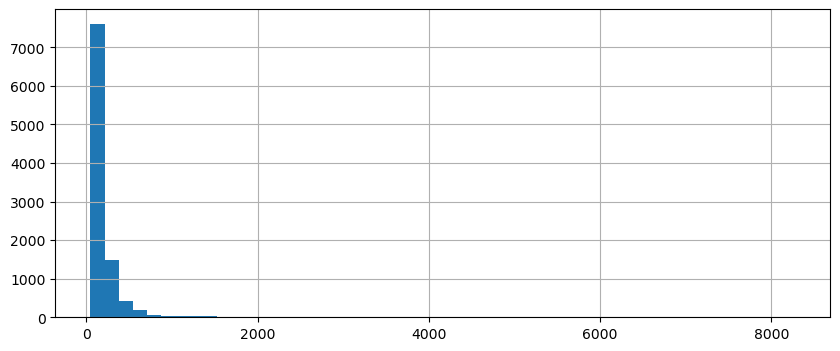

In [9]:
#We can see that lot of songs have a very low rating count
%matplotlib inline
import matplotlib.pyplot as plt
analysis['rating_count'].hist(bins=50, figsize=(10,4))
plt.show()

In [10]:
analysis['rating_count'].describe()

count    10000.000000
mean       208.694600
std        351.823049
min         48.000000
25%         89.000000
50%        126.000000
75%        205.000000
max       8277.000000
Name: rating_count, dtype: float64

In [11]:
analysis.sort_values(by="rating_count")

,avg_rating,rating_count
song_id,,
SOYYBJJ12AB017E9FD,2.395833,48
SOGSPGJ12A8C134FAA,3.166667,48
SOBPGWB12A6D4F7EF3,5.400000,50
SOWNLZF12A58A79811,2.980392,51
SOLIGVL12AB017DBAE,2.098039,51
...,...,...
SOBONKR12A58A7A7E0,8.442920,6412
SOAXGDH12A8C13F8A1,3.836955,6949
SOAUWYT12A81C206F1,7.004124,7032


In [12]:
#Lets take only songs_with more than 125 rating_counts to include songs with higher reach
count_filter=analysis[analysis['rating_count']>125].index
count_filter

Index(['SOAACPJ12A81C21360', 'SOAAFAC12A67ADF7EB', 'SOAAFYH12A8C13717A',
       'SOAAROC12A6D4FA420', 'SOAATLI12A8C13E319', 'SOAAUKC12AB017F868',
       'SOAAVUV12AB0186646', 'SOAAWEE12A6D4FBEC8', 'SOABHYV12A6D4F6D0F',
       'SOABJBU12A8C13F63F',
       ...
       'SOZYDZR12A8C13F4F0', 'SOZYSDT12A8C13BFD7', 'SOZYUGZ12A8AE472AC',
       'SOZYUXF12A6701F7B9', 'SOZZHQT12AB018B714', 'SOZZIOH12A67ADE300',
       'SOZZLZN12A8AE48D6D', 'SOZZTCU12AB0182C58', 'SOZZTNF12A8C139916',
       'SOZZVWB12AB0189C30'],
      dtype='object', name='song_id', length=5013)

In [13]:
filter_applied=new_df[new_df['song_id'].isin(count_filter)]
filter_applied.head()

,user,song_id,new_rating,rating,title,release,artist_name,year
0,00003a4459f33b92906be11abe0e93efc423c0ff,SOJJRVI12A6D4FBE49,1.0,1,Only You (Illuminate Album Version),Illuminate,David Crowder*Band,2003
3,00003a4459f33b92906be11abe0e93efc423c0ff,SONFEUF12AAF3B47E3,3.0,3,Não É Proibido,Não É Proibido,Marisa Monte,0
4,00003a4459f33b92906be11abe0e93efc423c0ff,SOVMGXI12AF72A80B0,1.0,1,Hey Mama,Elephunk,Black Eyed Peas,2003
6,00003a4459f33b92906be11abe0e93efc423c0ff,SOWVBDQ12A8C13503D,3.0,3,Volveré,A Tiempo,Gian Marco,0
8,00005c6177188f12fb5e2e82cdbd93e8a3f35e64,SOGMLQO12A670207BF,1.0,1,What Difference Does It Make?,The Smiths,The Smiths,1984


In [14]:
final_df=filter_applied.drop("rating",axis=1)
final_df.head()

,user,song_id,new_rating,title,release,artist_name,year
0,00003a4459f33b92906be11abe0e93efc423c0ff,SOJJRVI12A6D4FBE49,1.0,Only You (Illuminate Album Version),Illuminate,David Crowder*Band,2003
3,00003a4459f33b92906be11abe0e93efc423c0ff,SONFEUF12AAF3B47E3,3.0,Não É Proibido,Não É Proibido,Marisa Monte,0
4,00003a4459f33b92906be11abe0e93efc423c0ff,SOVMGXI12AF72A80B0,1.0,Hey Mama,Elephunk,Black Eyed Peas,2003
6,00003a4459f33b92906be11abe0e93efc423c0ff,SOWVBDQ12A8C13503D,3.0,Volveré,A Tiempo,Gian Marco,0
8,00005c6177188f12fb5e2e82cdbd93e8a3f35e64,SOGMLQO12A670207BF,1.0,What Difference Does It Make?,The Smiths,The Smiths,1984


# Collaborative Approach

In [15]:
import re  #Importing regular expression library

def clean_title(title):
  return re.sub("[^a-zA-Z0-9]"," ",title)

In [16]:
final_df['clean_title']=final_df['title'].apply(clean_title)

In [17]:
pivoted_df=final_df.pivot_table(index="clean_title",columns="user",values="new_rating").fillna(0)
pivoted_df

user,00003a4459f33b92906be11abe0e93efc423c0ff,00005c6177188f12fb5e2e82cdbd93e8a3f35e64,00030033e3a2f904a48ec1dd53019c9969b6ef1f,0007235c769e610e3d339a17818a5708e41008d9,0007c0e74728ca9ef0fe4eb7f75732e8026a278b,000a5c8b4d8b2c98f7a205219181d039edcd4506,000b474f815bcff17a4bc9ce5324f9352dafe07d,000b4e4134d5f77d7608fbf86fb3e1adac4478a8,000b9a54ef0560b957ee0f7a4cb933c36025e600,000d2df2cb8ad7300f89512f8fe8fadc4f99e733,...,fff877d23bf5b31fa2b013f51a7f939f12c374f2,fffa7a01e539be1f23e471503f29d8acb3c0ce7c,fffad4a128cd3d130f06c0f7bf493781081afe3c,fffb701ee87a32eff67eb040ed59146121f01571,fffc0df75a48d823ad5abfaf2a1ee61eb1e3302c,fffce9c1537fbc350ea68823d956eaa8f5236dbe,fffd6a2bdef646ce9898b628d5dd56c43df69a9d,fffd9635b33f412de8ed02e44e6564e3644cf3c6,fffe6d1d8500f1c1f31bd63abce35c0f975a86bf,fffea3d509760c984e7d40789804c0e5e289cc86
clean_title,,,,,,,,,,,,,,,,,,,,,
Baby One More Time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Come Around,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Down,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Antichrist Television Blues,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mOBSCENE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
paranoid android,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
re stacks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Creating array_matrix
from scipy.sparse import csr_matrix
song_features=csr_matrix(pivoted_df.values)

In [19]:
#Creating Knn model using cosine similarity
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric="cosine",algorithm="brute")
model_knn.fit(song_features)

NearestNeighbors(algorithm='brute', metric='cosine')

In [21]:
query_index='Down By The Water'
distances,indices=model_knn.kneighbors(pivoted_df.loc[query_index,:].values.reshape(1,-1),n_neighbors=6)

In [22]:
similar_songs=[]
for i in range(0,len(distances.flatten())):
    similar_songs.append(pivoted_df.index[indices.flatten()[i]])
similar_songs

['Down By The Water',
 'Talk Shows On Mute',
 'She s So Cold',
 'She s So Cold  1994 Digital Remaster ',
 'Diary',
 'Unprotected Sex With Multiple Partners']

In [23]:
def knn_collab(ids):
    query_index=clean_title(ids)
    distances,indices=model_knn.kneighbors(pivoted_df.loc[query_index,:].values.reshape(1,-1),n_neighbors=6)
    collaborative_indexes=[]
    for i in range(0,len(distances.flatten())):
        collaborative_indexes.append(pivoted_df.index[indices.flatten()[i]])
    knn_result=final_df[final_df["clean_title"].isin(collaborative_indexes)]['clean_title'].unique()
    results=song_data[song_data['title'].isin(knn_result)]
    return results

In [24]:
knn_collab("Down By The Water")

,song_id,title,release,artist_name,year
16105,SOEJMDR12A58A7E62A,Talk Shows On Mute,Live In Sweden 2004,Incubus,2003
35578,SOCKGYC12AB018CB4C,Diary,Small Lights in the Dark,Lunik,2010
49020,SOGIVSP12AF729A146,Down By The Water,To Bring You My Love,PJ Harvey,1995
83329,SOTKTVX12A58A7DD8D,Diary,Lies,Bon Voyage,2008
116278,SOYAFGE12A8C13761E,Talk Shows On Mute,A Crow Left Of The Murder...,Incubus,2003
213573,SOZBEEE12A8C132C72,Diary,The Moon & The Banana Tree-Madagascar Guitar,Bob Baldwin,0
373997,SOTLQWL12AB018167B,Unprotected Sex With Multiple Partners,Searching For A Former Clarity,Against Me!,2005
380571,SOXIEVW12A8C13DC32,Diary,Unplugged,Alicia Keys,2005
474887,SOWRMDY12A8C13EEAE,Diary,Dance Vault Remixes - Diary,Alicia Keys featuring Tony! Toni! Toné! and Je...,2005
497479,SOQEPKZ12AB0187B66,Diary,Flair For Darjeeling,The Loch Ness Mouse,1999


In [25]:
titles=['Down By The Water',
 'Talk Shows On Mute',
 'She s So Cold',
 'She s So Cold  1994 Digital Remaster ',
 'Diary']

In [26]:
combined_df_list = []  # List to store individual DataFrames

for i in titles:
    df = knn_collab(i)  # Get DataFrame for each title
    combined_df_list.append(df)  # Append each DataFrame to the list

# Combine all DataFrames in the list vertically
combined_df = pd.concat(combined_df_list, ignore_index=True)

# Now, combined_df contains the concatenated DataFrame of all outputs
combined_df

,song_id,title,release,artist_name,year
0,SOEJMDR12A58A7E62A,Talk Shows On Mute,Live In Sweden 2004,Incubus,2003
1,SOCKGYC12AB018CB4C,Diary,Small Lights in the Dark,Lunik,2010
2,SOGIVSP12AF729A146,Down By The Water,To Bring You My Love,PJ Harvey,1995
3,SOTKTVX12A58A7DD8D,Diary,Lies,Bon Voyage,2008
4,SOYAFGE12A8C13761E,Talk Shows On Mute,A Crow Left Of The Murder...,Incubus,2003
...,...,...,...,...,...
235,SOGUCIK12A8C140E3A,Diary,Playlist,"Kenny ""Babyface"" Edmonds",0
236,SOIDHAU12AB017A46F,Diary,Back 2 Back,Stargard,0
237,SOCSETK12AB0182845,Diary,Sound On Sound,Saturday Looks Good To Me,2002
238,SOZKHFN12A8C13E2D0,Diary,Dance Vault Remixes - Diary,Alicia Keys featuring Tony! Toni! Toné! and Je...,2005


# Content Based

In [27]:
song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634169 entries, 0 to 2086945
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   user         1634169 non-null  object 
 1   song_id      1634169 non-null  object 
 2   new_rating   1634169 non-null  float64
 3   title        1634169 non-null  object 
 4   release      1634169 non-null  object 
 5   artist_name  1634169 non-null  object 
 6   year         1634169 non-null  int64  
 7   clean_title  1634169 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 112.2+ MB


In [29]:
song_data_copy=song_data

In [30]:
song_data=song_data[song_data['title'].isin(final_df['title'])]

In [31]:
print(song_data.shape)
print(song_data_copy.shape)

(34960, 5)
(1000000, 5)


In [32]:
import re

def clean_title2(title):
    if isinstance(title, str):  # Check if input is a string
        return re.sub("[^a-zA-Z0-9]", " ", title)
    else:
        return ""

In [33]:
song_data['clean_title']=song_data['title'].apply(clean_title2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13692\2114289830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data['clean_title']=song_data['title'].apply(clean_title2)


In [34]:
song_data['comb']=song_data['title']+song_data['artist_name'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13692\3692409668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data['comb']=song_data['title']+song_data['artist_name'].astype(str)


In [35]:

song_data['comb']=song_data['comb'].apply(clean_title2)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13692\4127514996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data['comb']=song_data['comb'].apply(clean_title2)


In [36]:
song_data['comb'].head()

8                   GoodbyeJoseph Locke
29                        TequilaPiotta
47                     ScreamBilly Idol
69                      You And IChasen
100    SuperstitionBeck  Bogert  Appice
Name: comb, dtype: object

In [37]:
# Based on title
#For a content Based Approach we will use Names
from sklearn.feature_extraction.text import TfidfVectorizer
tfv=TfidfVectorizer(ngram_range=(1,3))
from sklearn.metrics.pairwise import cosine_similarity
title_vector=tfv.fit_transform(song_data['comb'])

In [38]:
def content_rec(entered_title):
    cleaned_title=clean_title(entered_title)
    new=tfv.transform([cleaned_title])
    similar_title=cosine_similarity(new,title_vector).flatten()
    indx=np.argpartition(similar_title,-10)[-10:]
    result = song_data.iloc[indx][::-1]
    return result

# Hybrid Recommendation

* Step 1 : Entering song name along with year to get your song
* Step 2 :From the similiar titles found from step 1 assuming your song would be in the top 5 we will take top 5 title and from these use the titles that have greter rating and recommend based upon it
* Step 3 :Find collaborative recommendations of these 3 titles and order it first from similar 3 movies followed by collaborative recommendation of first movie followed by rest 3


In [39]:
def final_recommendation(movie_title,number):
  songs=content_rec(movie_title)

  finding_collab_song=songs[songs['title'].isin(final_df['title'])]['title'].unique()


  combined_df_list = []  # List to store individual DataFrames

  for i in finding_collab_song:
      df = knn_collab(i)  # Get DataFrame for each title
      combined_df_list.append(df)  # Append each DataFrame to the list

  if len(combined_df_list)<=0:
    combined_df=None
  else:
    combined_df = pd.concat(combined_df_list, ignore_index=True)

  if combined_df is None:
    return songs
  else:
    return pd.concat([songs,combined_df],ignore_index=True).head(number)

  #Now Combine content based and collaborative filtering together

In [40]:
final_recommendation(" ozzy ozborn",20)

,song_id,title,release,artist_name,year,clean_title,comb
0,SONRGQV12A8C13CB4C,Lucky,Treatment 5,Osker,1999,Lucky,LuckyOsker
1,SOADWIU12AB017E8A1,Love Me,Exit,üNN,2008,Love Me,Love Me NN
2,SOQDBOA12A8C13E5E6,Rain,The Broken String,Bishop Allen,2007,Rain,RainBishop Allen
3,SOOTYEZ12AC4687F68,Hold On,Steppin' It Up A Notch,Steve Wilson,0,Hold On,Hold OnSteve Wilson
4,SOMTUVP12A8C13DC25,My Moon My Man,I Feel It All,Feist,0,My Moon My Man,My Moon My ManFeist
5,SOBMHQS12AB018275F,Violence,För Väntan,Eva Dahlgren,1981,Violence,ViolenceEva Dahlgren
6,SOWBUPG12AB0189CA5,No Remorse,Back from the Path,Shall Remain,0,No Remorse,No RemorseShall Remain
7,SOONPYA12AB0185A6F,All I Want,Celsius,Tech N9ne,2002,All I Want,All I WantTech N9ne
8,SOIHLQA12A58A76F7D,Venus,Closure: Live,Theatre Of Tragedy,1998,Venus,VenusTheatre Of Tragedy
9,SOPIUMG12A6D4F7059,Let Me Go,Street Music,Redrama,2005,Let Me Go,Let Me GoRedrama


In [41]:
final_recommendation("Creep Radiohead",10)

,song_id,title,release,artist_name,year,clean_title,comb
0,SOQQQMM12A6310DFCC,(Nice Dream),The Bends (Collectors Edition),Radiohead,1995,Nice Dream,Nice Dream Radiohead
1,SOTVFIU12AC46878B7,Exit Music (For A Film),OK Computer (Collector's Edition),Radiohead,1997,Exit Music For A Film,Exit Music For A Film Radiohead
2,SOMTUVP12A8C13DC25,My Moon My Man,I Feel It All,Feist,0,My Moon My Man,My Moon My ManFeist
3,SOOTYEZ12AC4687F68,Hold On,Steppin' It Up A Notch,Steve Wilson,0,Hold On,Hold OnSteve Wilson
4,SOPQLBY12A6310E992,Creep (Explicit),Pablo Honey,Radiohead,1993,Creep Explicit,Creep Explicit Radiohead
5,SODZDBP12A8C1442C2,Creep (LP Version),Core,Stone Temple Pilots,1992,Creep LP Version,Creep LP Version Stone Temple Pilots
6,SONRGQV12A8C13CB4C,Lucky,Treatment 5,Osker,1999,Lucky,LuckyOsker
7,SOWBUPG12AB0189CA5,No Remorse,Back from the Path,Shall Remain,0,No Remorse,No RemorseShall Remain
8,SOADWIU12AB017E8A1,Love Me,Exit,üNN,2008,Love Me,Love Me NN
9,SOQDBOA12A8C13E5E6,Rain,The Broken String,Bishop Allen,2007,Rain,RainBishop Allen


In [42]:
final_recommendation("Pump It Black eyed peas",20)

,song_id,title,release,artist_name,year,clean_title,comb
0,SOPBRJY12AF72A4440,I Gotta Feeling (FMIF Remix Edit),One Love,Black Eyed Peas,2009,I Gotta Feeling FMIF Remix Edit,I Gotta Feeling FMIF Remix Edit Black Eyed Peas
1,SOIWAWU12A6D4F975E,Pump It,Pump It,Black Eyed Peas,2005,Pump It,Pump ItBlack Eyed Peas
2,SOMEUED12A6701DBEA,Pump It,Pump It,Black Eyed Peas,2005,Pump It,Pump ItBlack Eyed Peas
3,SOGWKVL12AF72A8A11,Movement,Behind The Front,Black Eyed Peas,1998,Movement,MovementBlack Eyed Peas
4,SOUUZPU12A6701FB90,My Humps,Monkey Business,Black Eyed Peas,2005,My Humps,My HumpsBlack Eyed Peas
5,SOWFIHB12A6D4F7782,My Humps,My Humps,Black Eyed Peas,2005,My Humps,My HumpsBlack Eyed Peas
6,SOEZALM12AB01868FA,I Gotta Feeling,Clubland 16,Black Eyed Peas,2009,I Gotta Feeling,I Gotta FeelingBlack Eyed Peas
7,SOXIUMU12A6701D946,Hey Mama,Hey Mama,Black Eyed Peas,2003,Hey Mama,Hey MamaBlack Eyed Peas
8,SOVMGXI12AF72A80B0,Hey Mama,Elephunk,Black Eyed Peas,2003,Hey Mama,Hey MamaBlack Eyed Peas
9,SOXFPND12AB017C9D1,I Gotta Feeling,Todo Éxitos 2009,Black Eyed Peas,2009,I Gotta Feeling,I Gotta FeelingBlack Eyed Peas


In [43]:
final_recommendation("BLack Betty Ram Jam",10)

,song_id,title,release,artist_name,year,clean_title,comb
0,SOEELLZ12AB0184A05,Black Betty,Original Hits - Pub Jukebox,Ram Jam,1977,Black Betty,Black BettyRam Jam
1,SOEUYWU12AB0182FD9,Summertime,Steps,Deepak Ram,0,Summertime,SummertimeDeepak Ram
2,SOGUXKE12A8C143ADC,Black Betty,100 Hits Of The '70s,Ram Jam,1977,Black Betty,Black BettyRam Jam
3,SOBRYZB12A8C1339C1,Black Betty,The Pop Years 1976 - 1977,Ram Jam,1977,Black Betty,Black BettyRam Jam
4,SOYBUDI12AB017AEF5,Black Betty,Bikers Best,Ram Jam,1977,Black Betty,Black BettyRam Jam
5,SOXUPSH12A8C1355CE,Black Betty,Disco Super Hits,Ram Jam,1977,Black Betty,Black BettyRam Jam
6,SOQESZX12A8C133F0D,Black Betty,The Dukes Of Hazzard (Music From The Motion Pi...,Ram Jam,1977,Black Betty,Black BettyRam Jam
7,SOGSLJZ12AB018263F,Black Betty,The Best Year Of My Life: 1977,Ram Jam,1977,Black Betty,Black BettyRam Jam
8,SOKGTNZ12A8AE47BF6,Black Betty,The Best Of The 70's (seventies),Ram Jam,1977,Black Betty,Black BettyRam Jam
9,SOVKAGC12AC46889D5,Black Betty,Ultimate Dance,Ram Jam,1977,Black Betty,Black BettyRam Jam
